In [ ]:
# Import necessary libraries

# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Data preprocessing
from sklearn.utils import resample                      # Sampling methods
from imblearn.over_sampling import SMOTE                # Over sampling
from imblearn.over_sampling import ADASYN               # Over sampling
from sklearn.model_selection import train_test_split    # Splitting datasets

# Feature engineering
import datetime as dt
from sklearn.preprocessing import StandardScaler    # Feature scaling
!pip install category_encoders                      # Install the category_encoders library
from category_encoders import WOEEncoder            # Import the WOEEncoder class from the category_encoders library
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score

# Style and color palette for seaborn plots
sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

# Manage warning messages
import warnings
warnings.simplefilter("ignore")     # Ignore all warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
# Install kaggle

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download datasets from Kaggle

! kaggle datasets download nelgiriyewithana/credit-card-fraud-detection-dataset-2023/

 98% 140M/143M [00:04<00:00, 39.9MB/s]
100% 143M/143M [00:04<00:00, 33.3MB/s]


In [ ]:
# Unzip dataset zip file

! unzip credit-card-fraud-detection-dataset-2023.zip

Archive:  credit-card-fraud-detection-dataset-2023.zip
  inflating: creditcard_2023.csv     


In [ ]:
# Load the datasets

# Dataset 3
train_df3 = pd.read_csv('/content/creditcard_2023.csv', index_col='id')

**Exploratory Data Analysis**

In [ ]:
# Display the first few rows of the train dataset

train_df3.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0


In [ ]:
# Dataset 3
print("\nTrain Data Info for Dataset 3:")
print(train_df3.info())


Train Data Info for Dataset 3:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 n

In [ ]:
# Dataset 3
print("\nShape of Train Dataset 3\n")
print(train_df3.shape)


Shape of Train Dataset 3

(568630, 30)


In [ ]:
# Dataset 3
print("\nMissing values and duplicate values in dataset 3\n")
print(train_df3.isna().sum().sum())
print(train_df3.duplicated().sum())


Missing values and duplicate values in dataset 3

0
1


In [ ]:
# Define df and copy train_df3 to df
df = train_df3.copy()

# Drop duplicate values from train_df3
train_df3.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [ ]:
# Calculate the number of frauds in train_df3 before dropping duplicates
frauds_before_drop = len(df[df['Class'] == 1])

# Calculate the number of frauds in train_df3 after dropping duplicates
frauds_after_drop = len(train_df3[train_df3['Class'] == 1])

print("The amount of frauds in train_df3 before dropping duplicates:", frauds_before_drop)
print("The amount of frauds in train_df3 after dropping duplicates:", frauds_after_drop)

The amount of frauds in train_df3 before dropping duplicates: 284315
The amount of frauds in train_df3 after dropping duplicates: 284314


As we can see we haven't dropped any important data.

In [ ]:
# Dataset 3
print("\nTrain Data 3 Summary Statistics:\n")
print(train_df3.describe())


Train Data 3 Summary Statistics:

                  V1             V2             V3            V4  \
count  568629.000000  568629.000000  568629.000000  5.686290e+05   
mean        0.000003      -0.000005       0.000002 -8.855104e-07   
std         0.999999       0.999996       1.000000  1.000002e+00   
min        -3.495584     -49.966572      -3.183760 -4.951222e+00   
25%        -0.565285      -0.486680      -0.649298 -6.560208e-01   
50%        -0.093636      -0.135894       0.000354 -7.376398e-02   
75%         0.832658       0.343553       0.628539  7.070060e-01   
max         2.229046       4.361865      14.125834  3.201536e+00   

                  V5             V6             V7             V8  \
count  568629.000000  568629.000000  568629.000000  568629.000000   
mean        0.000002      -0.000006       0.000004       0.000011   
std         1.000001       0.999993       0.999997       0.999970   
min        -9.952786     -21.111108      -4.351839     -10.756342   
25%    

In [ ]:
# Dataset 3
print("\nTrain Dataset 3")
is_fraud = train_df3["Class"].value_counts()
print("Fraud: ",is_fraud[1])
print("Legitimate: ",is_fraud[0])


Train Dataset 3
Fraud:  284314
Legitimate:  284315


The dataset is already balanced.


Train Dataset 3



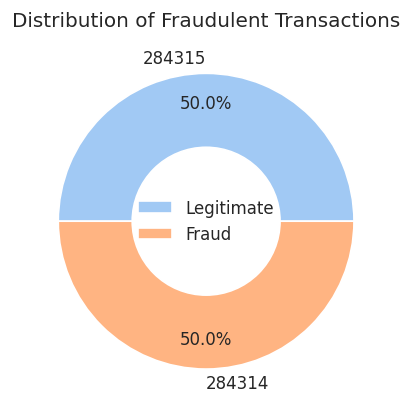

In [ ]:
# Dataset 3
print("\nTrain Dataset 3\n")
donut = train_df3["Class"].value_counts().reset_index()

labels = ["Legitimate", "Fraud"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["count"],
        labels=donut["count"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Fraudulent Transactions")
plt.legend(labels, loc="center", frameon=False)
plt.show();

In [ ]:
train_df3.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561181,0.484497,-0.498963,0.517461,0.354741,0.573378,-0.226783,0.548975,0.599107,...,-0.034647,-0.073751,-0.068900,-0.014654,-0.008507,0.009280,-0.122768,0.070117,-0.001276,-0.505760
V2,-0.561181,1.000000,-0.627810,0.579639,-0.631669,-0.341060,-0.694018,0.191356,-0.585100,-0.621799,...,-0.013607,0.035377,0.151884,-0.027511,0.132443,0.012220,0.053828,0.021062,-0.000083,0.491877
V3,0.484497,-0.627810,1.000000,-0.687726,0.510350,0.508986,0.634335,-0.263040,0.648616,0.707676,...,-0.021694,-0.041985,-0.058873,0.076458,-0.076331,-0.052056,-0.190579,0.005351,-0.001998,-0.682095
V4,-0.498963,0.579639,-0.687726,1.000000,-0.429242,-0.474411,-0.588649,0.199024,-0.676649,-0.712839,...,-0.013101,0.091206,0.043262,-0.102508,0.029402,0.136679,0.188035,-0.011318,0.001858,0.735981
V5,0.517461,-0.631669,0.510350,-0.429242,1.000000,0.245194,0.586828,-0.314996,0.479615,0.563874,...,0.034162,-0.119167,-0.113912,-0.083244,-0.047845,0.047771,-0.043756,0.108426,-0.000013,-0.338638
V6,0.354741,-0.341060,0.508986,-0.474411,0.245194,1.000000,0.418722,-0.604482,0.432243,0.471008,...,-0.040202,0.036935,0.308576,-0.005231,-0.195344,-0.067605,-0.260795,-0.065655,0.000725,-0.435098
V7,0.573378,-0.694018,0.634335,-0.588649,0.586828,0.418722,1.000000,-0.181017,0.601793,0.678005,...,0.019662,-0.104074,-0.111155,-0.004156,0.000804,-0.006489,-0.036551,0.040741,0.001332,-0.491233
V8,-0.226783,0.191356,-0.263040,0.199024,-0.314996,-0.604482,-0.181017,1.000000,-0.208560,-0.200009,...,0.056506,-0.098827,-0.463612,0.083263,0.322654,0.040447,0.298425,0.046042,-0.000192,0.144309
V9,0.548975,-0.585100,0.648616,-0.676649,0.479615,0.432243,0.601793,-0.208560,1.000000,0.748487,...,0.131005,-0.204728,-0.042376,0.044007,-0.034885,-0.131000,-0.111843,0.069958,-0.001589,-0.585523
V10,0.599107,-0.621799,0.707676,-0.712839,0.563874,0.471008,0.678005,-0.200009,0.748487,1.000000,...,0.037438,-0.150970,-0.056279,0.045934,-0.014045,-0.053684,-0.134905,0.035649,-0.001258,-0.673665


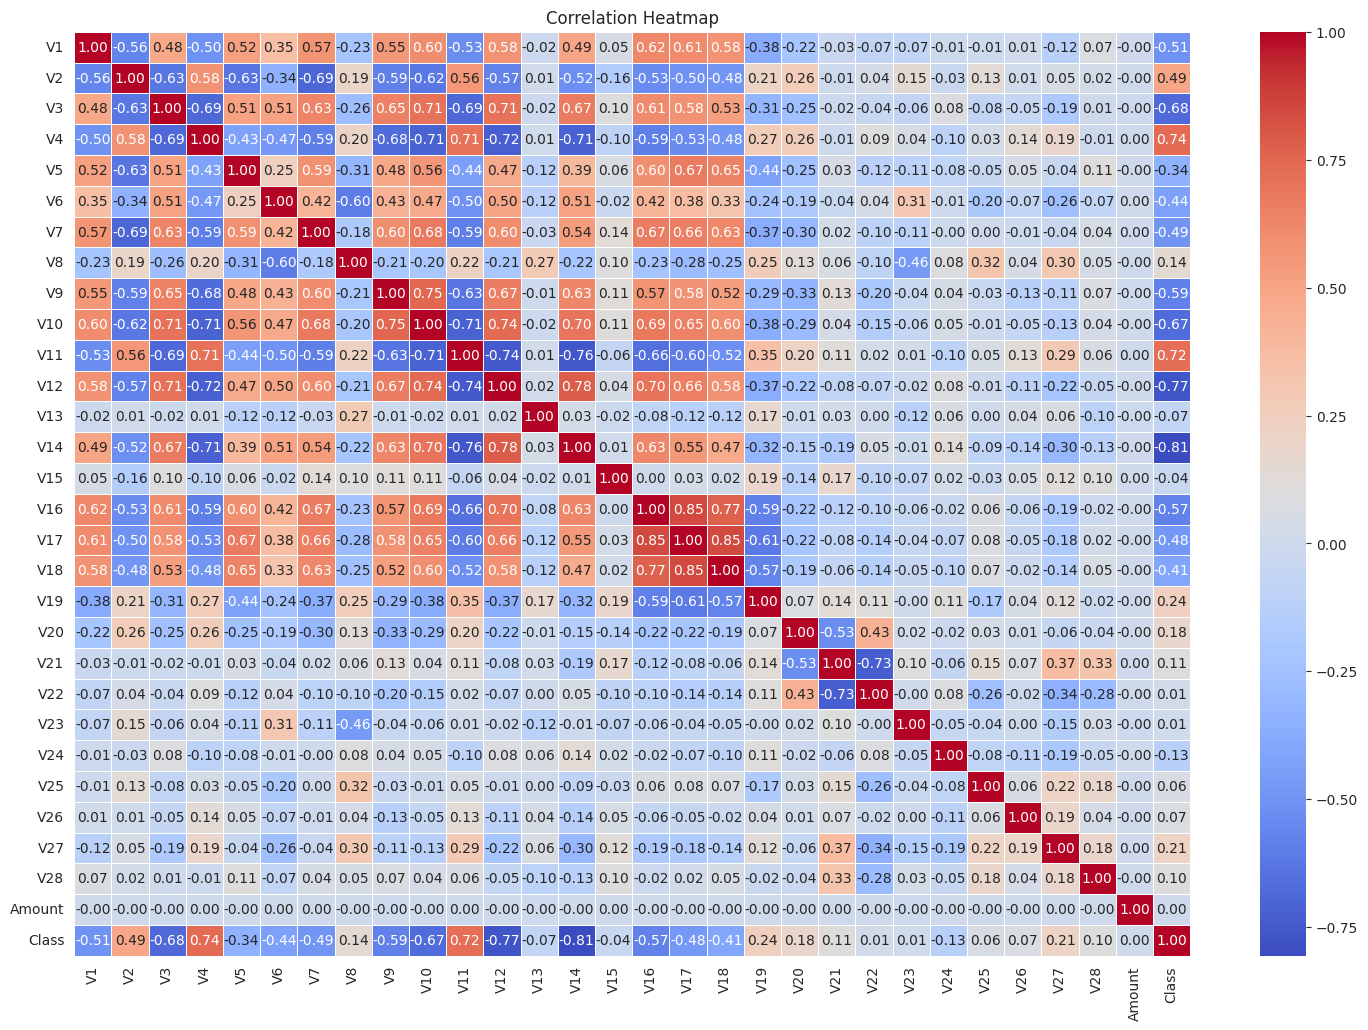

In [ ]:
# Plotting a heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(train_df3.corr(),annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

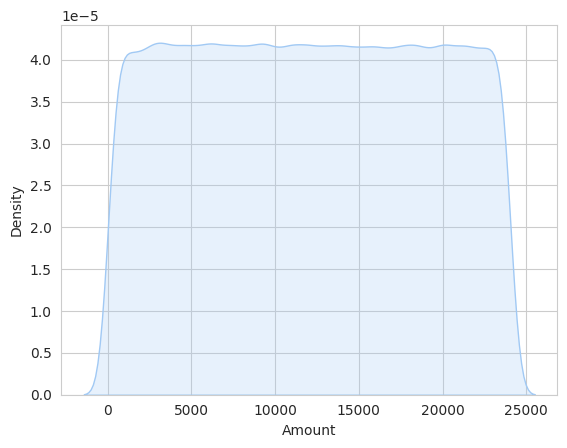

In [ ]:
sns.kdeplot(train_df3["Amount"], fill=True);

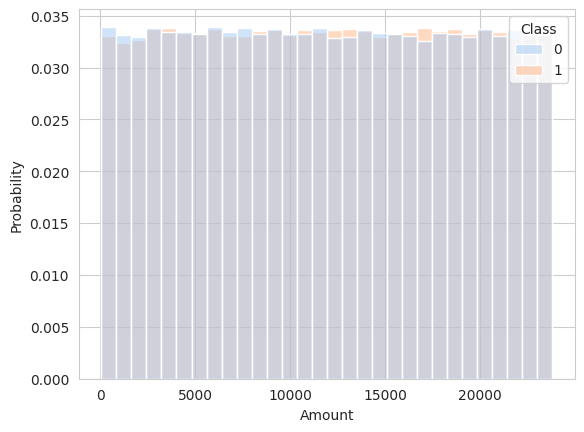

In [ ]:
pct99 = train_df3["Amount"].quantile(0.99)
sns.histplot(x="Amount", hue="Class", bins=30,
             stat="probability", data=train_df3[train_df3["Amount"] <= pct99],
             common_norm=False);

**FEATURE ENGINEERING**

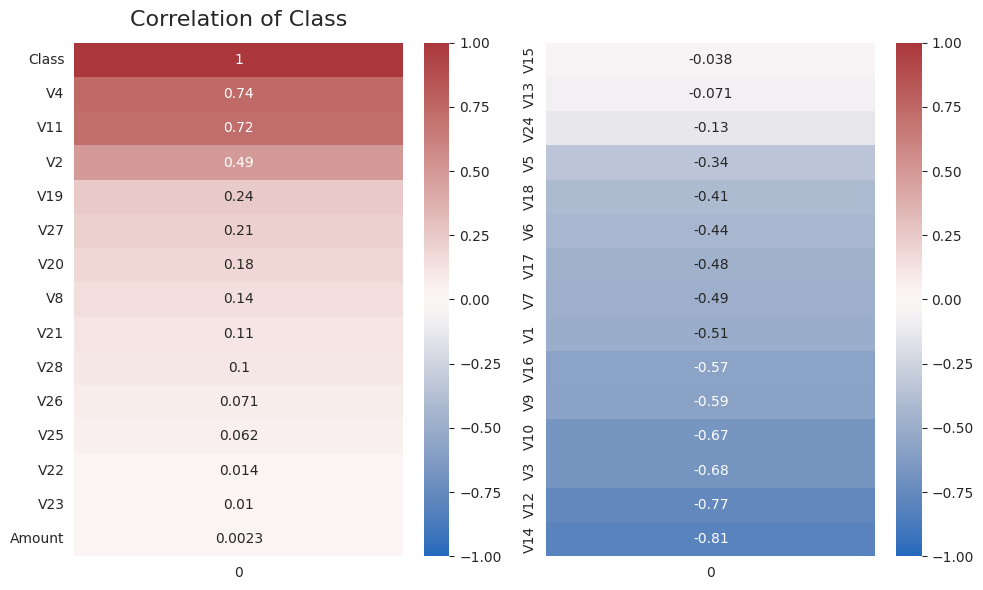

In [ ]:
# Calculate correlation matrix
correlation_matrix = train_df3.corrwith(train_df3['Class']).sort_values(ascending=False)

# Split correlation matrix into two halves
half_length = len(correlation_matrix) // 2
first_half = correlation_matrix[:half_length]
second_half = correlation_matrix[half_length:]

# Set up the plots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot the heatmap for the first half
heatmap1 = sns.heatmap(first_half.to_frame(), vmin=-1, vmax=1, annot=True, cmap='vlag', ax=axs[0])
heatmap1.set_title('Correlation of Class', fontdict={'fontsize': 16}, pad=12)

# Plot the heatmap for the second half
heatmap2 = sns.heatmap(second_half.to_frame(), vmin=-1, vmax=1, annot=True, cmap='vlag', ax=axs[1])

# Adjust layout
plt.tight_layout()
plt.show()

In pursuit of optimizing the model, features with correlation values within the range of [-0.1, 0.1] will be excluded during feature selection.

In [ ]:
# Feature Selection
train_df3 = train_df3[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V14','V16','V17','V18','V19','V20','V11','V24','V27', 'Class']].copy(deep = True)
train_df3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V16,V17,V18,V19,V20,V11,V24,V27,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.549020,0.215598,0.512307,0.333644,0.124270,0.091202,-0.987020,0.165959,-0.081230,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,0.627719,0.789188,0.403810,0.201799,-0.340687,-0.233984,0.140107,-0.577395,-0.248052,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.616874,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.272985,-1.154666,-0.300258,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,0.559535,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.752581,-1.893131,-0.165316,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.241454,0.224538,0.366466,0.291782,0.445317,0.247237,-1.203171,0.312561,0.023712,0


In [ ]:
# Separate features and labels
X_train3 = train_df3.drop('Class', axis=1)
y_train3 = train_df3['Class']

In [ ]:
# Splitting the dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train3, y_train3, test_size=0.2, random_state=65)

In [ ]:
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)

**[1] Logistic Regression -> LR**

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train3_scaled, y_train3)
predict_LR = LR_model.predict(X_test3_scaled)
print(classification_report(y_test3, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test3)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_LR = LR_model.predict_proba(X_test3_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test3, y_probs_LR)

# Calculate AUC
auc_LR = roc_auc_score(y_test3, y_probs_LR)

print('AUC for Logistic Regression: {:.2f}'.format(auc_LR))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     57201
           1       0.98      0.95      0.96     56525

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726

Logistic Regression accuracy is: 96.47%
AUC for Logistic Regression: 0.99


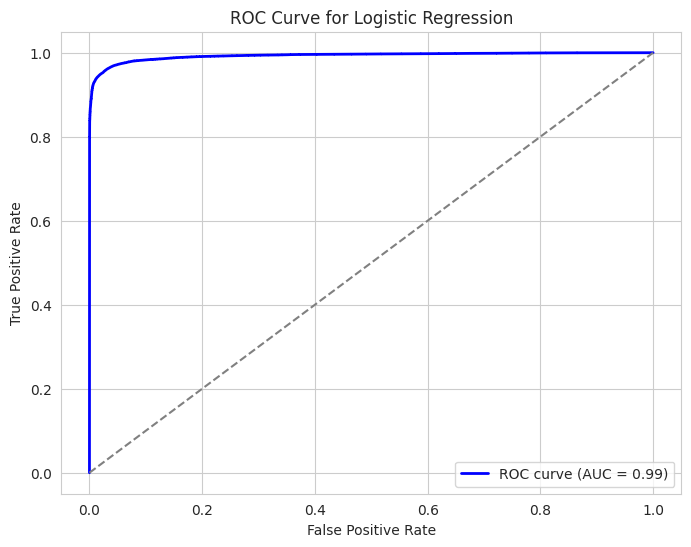

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_LR))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

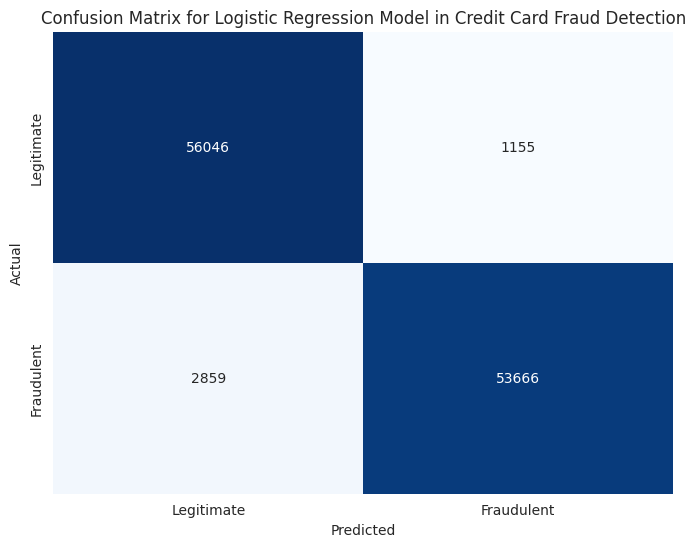

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test3, predict_LR)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test3, predict_LR, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_LR]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.978931
1     Recall  0.949421
2   F1-Score  0.963950
3   Accuracy  0.964705
4        AUC  0.992790


**[2] Decision Tree Model (ID3)**

In [ ]:
DT_model = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT_model.fit(X_train3_scaled, y_train3)
predict_DT = DT_model.predict(X_test3_scaled)
print(classification_report(y_test3, predict_DT))
DT_accuracy = accuracy_score(predict_DT,y_test3)
print('Decision Tree Classifier model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_DT = DT_model.predict_proba(X_test3_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test3, y_probs_DT)

# Calculate AUC
auc_DT = roc_auc_score(y_test3, y_probs_DT)

print('AUC for Decision Tree Classifier: {:.2f}'.format(auc_DT))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     57201
           1       0.97      0.89      0.93     56525

    accuracy                           0.93    113726
   macro avg       0.94      0.93      0.93    113726
weighted avg       0.93      0.93      0.93    113726

Decision Tree Classifier model accuracy is: 93.17%
AUC for Decision Tree Classifier: 0.93


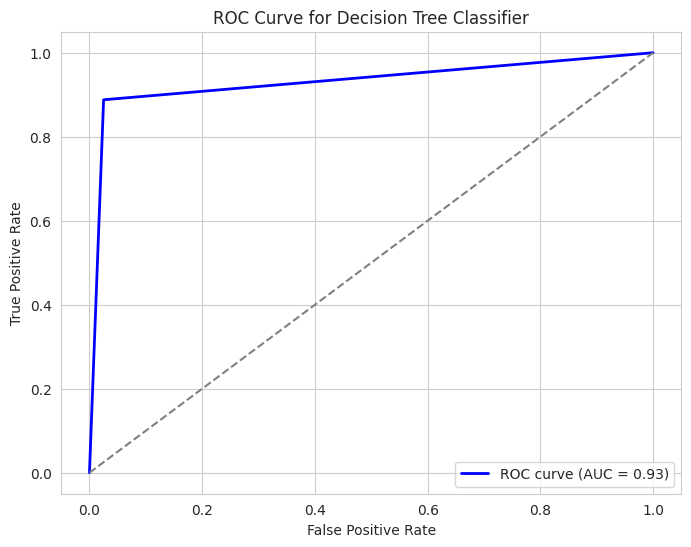

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_DT))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

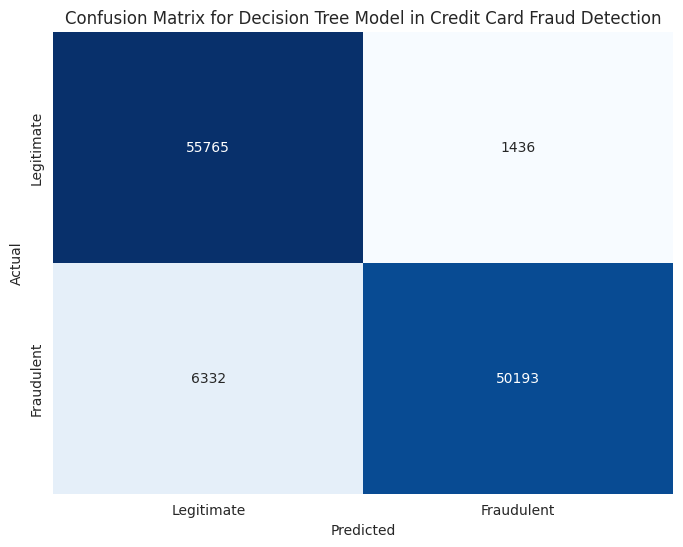

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test3, predict_DT)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test3, predict_DT, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_DT]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.972186
1     Recall  0.887979
2   F1-Score  0.928176
3   Accuracy  0.931695
4        AUC  0.931437


**[3] XGB Classifier**

In [ ]:
# Initialize and train the XGBoost classifier
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train3_scaled, y_train3)

# Make predictions on the test set
predict_XGB = XGB_model.predict(X_test3_scaled)

# Evaluate the model
print(classification_report(y_test3, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test3)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_XGB = XGB_model.predict_proba(X_test3_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test3, y_probs_XGB)

# Calculate AUC
auc_XGB = roc_auc_score(y_test3, y_probs_XGB)

print('AUC for XGBoost classifier: {:.2f}'.format(auc_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57201
           1       1.00      1.00      1.00     56525

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

XGBoost model accuracy is: 99.95%
AUC for XGBoost classifier: 1.00


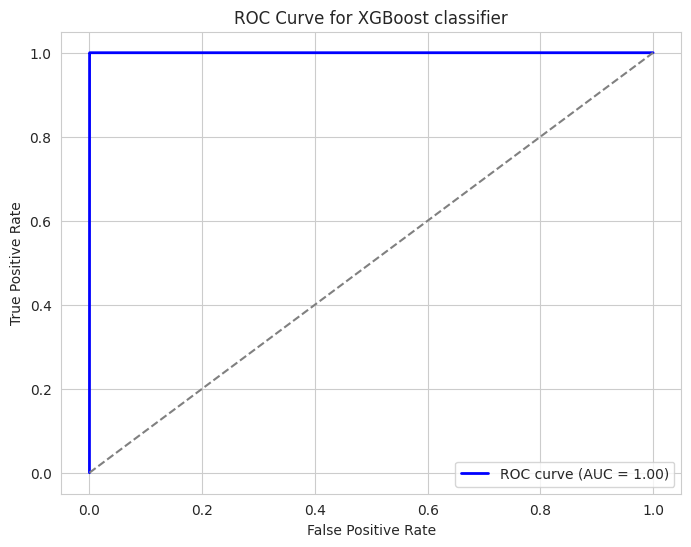

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_XGB))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

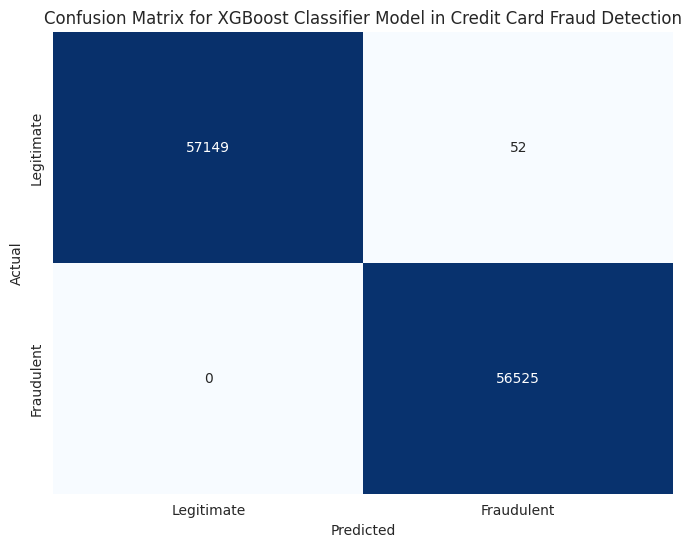

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test3, predict_XGB)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test3, predict_XGB, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_XGB]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.999081
1     Recall  1.000000
2   F1-Score  0.999540
3   Accuracy  0.999543
4        AUC  0.999973


**[4] Random Forest Classifier**

In [ ]:
# Initialize and train the Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_model.fit(X_train3_scaled, y_train3)

predict_RF = RF_model.predict(X_test3_scaled)

# Evaluate the model
print(classification_report(y_test3, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test3)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_RF = RF_model.predict_proba(X_test3_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test3, y_probs_RF)

# Calculate AUC
auc_RF = roc_auc_score(y_test3, y_probs_RF)

print('AUC for Random Forest classifier: {:.2f}'.format(auc_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57201
           1       1.00      1.00      1.00     56525

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Random Forest model accuracy is: 99.99%
AUC for Random Forest classifier: 1.00


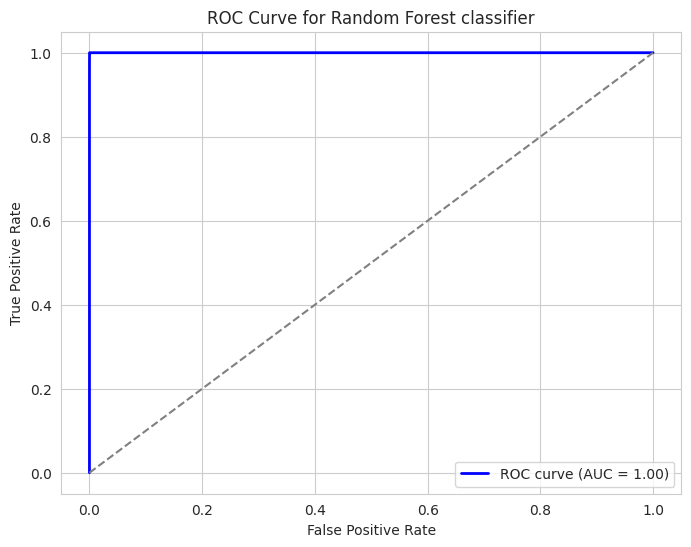

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_RF))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

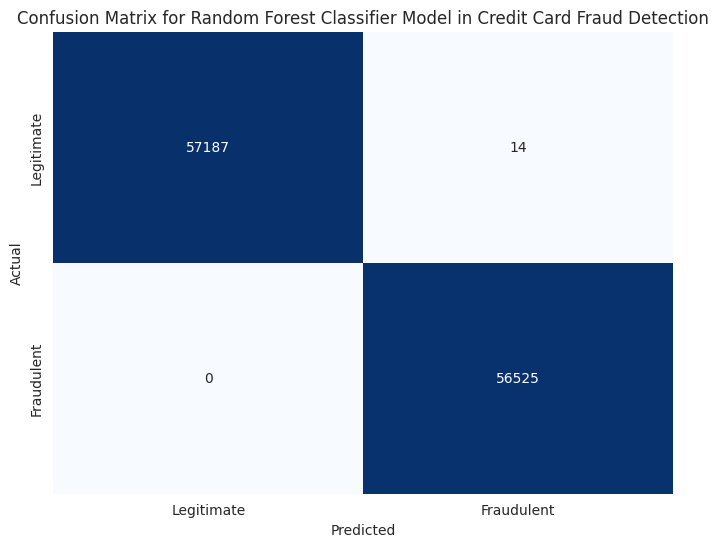

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test3, predict_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test3, predict_RF, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_RF]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.999752
1     Recall  1.000000
2   F1-Score  0.999876
3   Accuracy  0.999877
4        AUC  0.999997


**[5] K-Nearest Neighbors (KNN) Model**

In [ ]:
# Instantiate KNN model
KNN_model = KNeighborsClassifier()

# Train the KNN model
KNN_model.fit(X_train3_scaled, y_train3)

# Make predictions on the test set
predict_KNN = KNN_model.predict(X_test3_scaled)

# Evaluate the performance of KNN model
print("Classification Report for K-Nearest Neighbors (KNN) Model:")
print(classification_report(y_test3, predict_KNN))

# Calculate accuracy
KNN_accuracy = accuracy_score(predict_KNN, y_test3)
print('K-Nearest Neighbors (KNN) accuracy is: {:.2f}%'.format(KNN_accuracy * 100))

# Calculate ROC curve and AUC

# Calculate probabilities for positive class
y_probs_KNN = KNN_model.predict_proba(X_test3_scaled)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test3, y_probs_KNN)

# Calculate AUC
auc_KNN = roc_auc_score(y_test3, y_probs_KNN)

print('AUC for K-Nearest Neighbors (KNN): {:.2f}'.format(auc_KNN))

Classification Report for K-Nearest Neighbors (KNN) Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57201
           1       1.00      1.00      1.00     56525

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

K-Nearest Neighbors (KNN) accuracy is: 99.90%
AUC for K-Nearest Neighbors (KNN): 1.00


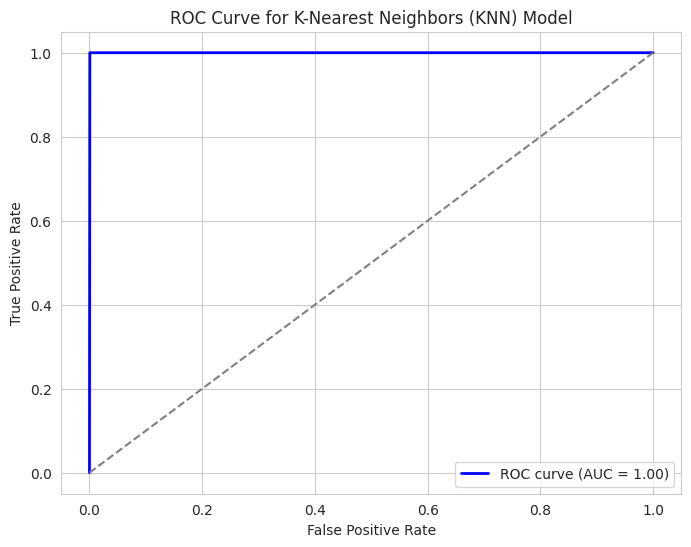

In [ ]:
# Print ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_KNN))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN) Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

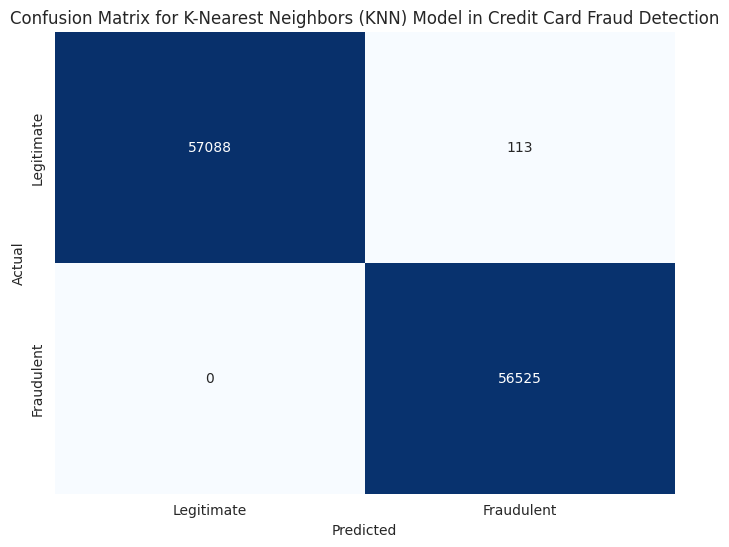

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test3, predict_KNN)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Legitimate", "Fraudulent"],
            yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN) Model in Credit Card Fraud Detection')
plt.show()

In [ ]:
# Define the classification report dictionary
classification_report_dict = classification_report(y_test3, predict_KNN, output_dict=True)

# Extract relevant metrics
precision = classification_report_dict['1']['precision']
recall = classification_report_dict['1']['recall']
f1_score = classification_report_dict['1']['f1-score']
accuracy = classification_report_dict['accuracy']

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC'],
    'Value': [precision, recall, f1_score, accuracy, auc_KNN]
})

# Print the DataFrame
print(metrics_df)

      Metric     Value
0  Precision  0.998005
1     Recall  1.000000
2   F1-Score  0.999001
3   Accuracy  0.999006
4        AUC  0.999703


In [ ]:
# Define the metrics for each model and sampling technique

# Define the classification report dictionary for logistic regression
classification_report_dict_LR = classification_report(y_test3, predict_LR, output_dict=True)

metrics_logistic_regression = {
    'precision': "{:.2f}".format(classification_report_dict_LR['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_LR['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_LR['1']['f1-score']),
    'accuracy': "{:.2f}".format(LR_accuracy),
    'auc': "{:.2f}".format(auc_LR)
}

# Define the classification report dictionary for decision tree
classification_report_dict_DT = classification_report(y_test3, predict_DT, output_dict=True)

metrics_decision_tree = {
    'precision': "{:.2f}".format(classification_report_dict_DT['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_DT['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_DT['1']['f1-score']),
    'accuracy': "{:.2f}".format(DT_accuracy),
    'auc': "{:.2f}".format(auc_DT)
}

# Define the classification report dictionary for XGB Classifier
classification_report_dict_XGB = classification_report(y_test3, predict_XGB, output_dict=True)

metrics_xgb_classifier = {
    'precision': "{:.2f}".format(classification_report_dict_XGB['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_XGB['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_XGB['1']['f1-score']),
    'accuracy': "{:.2f}".format(XGB_accuracy),
    'auc': "{:.2f}".format(auc_XGB)
}

# Define the classification report dictionary for Random Forest
classification_report_dict_RF = classification_report(y_test3, predict_RF, output_dict=True)

metrics_random_forest = {
    'precision': "{:.2f}".format(classification_report_dict_RF['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_RF['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_RF['1']['f1-score']),
    'accuracy': "{:.2f}".format(RF_accuracy),
    'auc': "{:.2f}".format(auc_RF)
}

# Define the classification report dictionary for KNeighbors Classifier
classification_report_dict_KNN = classification_report(y_test3, predict_KNN, output_dict=True)

metrics_kneighbors = {
    'precision': "{:.2f}".format(classification_report_dict_KNN['1']['precision']),
    'recall': "{:.2f}".format(classification_report_dict_KNN['1']['recall']),
    'f1-score': "{:.2f}".format(classification_report_dict_KNN['1']['f1-score']),
    'accuracy': "{:.2f}".format(KNN_accuracy),
    'auc': "{:.2f}".format(auc_KNN)
}

# Create a DataFrame to store the metrics
metrics_df_undersampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGB Classifier', 'Random Forest', 'KNeighbors Classifier'],
    'Precision': [metrics_logistic_regression['precision'], metrics_decision_tree['precision'], metrics_xgb_classifier['precision'], metrics_random_forest['precision'], metrics_kneighbors['precision']],
    'Recall': [metrics_logistic_regression['recall'], metrics_decision_tree['recall'], metrics_xgb_classifier['recall'], metrics_random_forest['recall'], metrics_kneighbors['recall']],
    'F1-Score': [metrics_logistic_regression['f1-score'], metrics_decision_tree['f1-score'], metrics_xgb_classifier['f1-score'], metrics_random_forest['f1-score'], metrics_kneighbors['f1-score']],
    'Accuracy': [metrics_logistic_regression['accuracy'], metrics_decision_tree['accuracy'], metrics_xgb_classifier['accuracy'], metrics_random_forest['accuracy'], metrics_kneighbors['accuracy']],
    'AUC': [metrics_logistic_regression['auc'], metrics_decision_tree['auc'], metrics_xgb_classifier['auc'], metrics_random_forest['auc'], metrics_kneighbors['auc']]
})

# Print the DataFrame
print("Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 3:")
print(metrics_df_undersampling)

Metrics for Logistic Regression, Decision Tree, XGB Classifier, Random Forest, and KNeighbors Classifier for Dataset 3:
                   Model Precision Recall F1-Score Accuracy   AUC
0    Logistic Regression      0.98   0.95     0.96     0.96  0.99
1          Decision Tree      0.97   0.89     0.93     0.93  0.93
2         XGB Classifier      1.00   1.00     1.00     1.00  1.00
3          Random Forest      1.00   1.00     1.00     1.00  1.00
4  KNeighbors Classifier      1.00   1.00     1.00     1.00  1.00


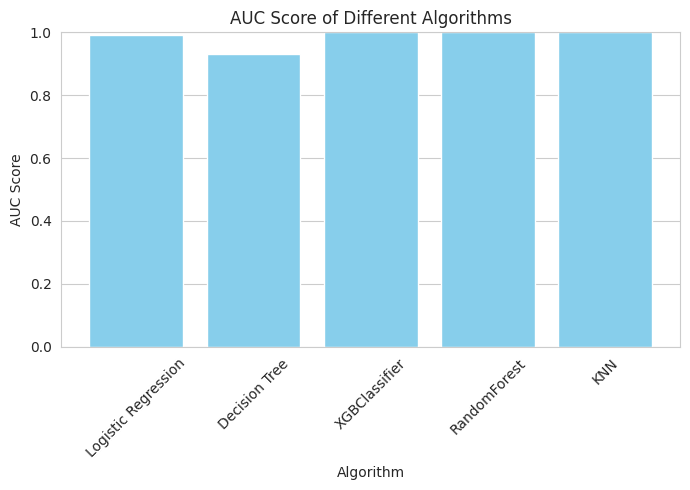

In [ ]:
Algorithms = ['Logistic Regression', 'Decision Tree', 'XGBClassifier', 'RandomForest', 'KNN']
AUC = [auc_LR, auc_DT, auc_XGB, auc_RF, auc_KNN]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'AUC Score':AUC})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['AUC Score'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('AUC Score')
plt.title('AUC Score of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (AUC Score ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

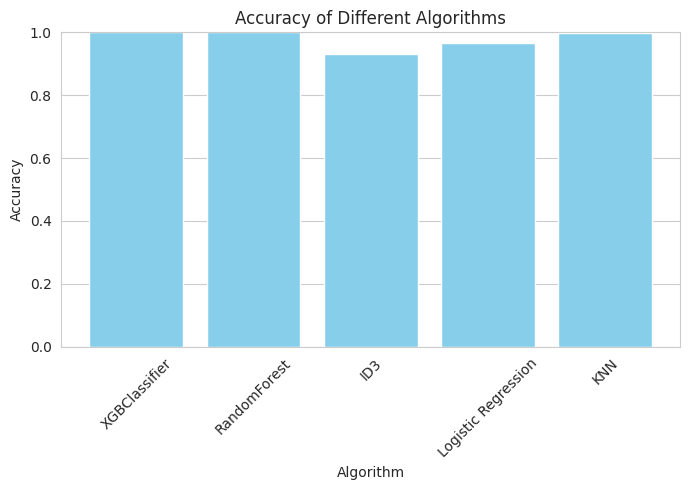

In [ ]:
Algorithms = ['XGBClassifier', 'RandomForest', 'ID3', 'Logistic Regression', 'KNN']
accuracy = [XGB_accuracy, RF_accuracy, DT_accuracy, LR_accuracy, KNN_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()